In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
import matplotlib

In [6]:
df=pd.read_csv('/content/medical-charges.csv')

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [39]:
import jovian

In [37]:
!pip install jovian

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.6 MB/s eta 0:00:00
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6478 sha256=8c15297edb8186d82ea3b7f61267fc742c96f2656c40f55ce8aa85a2489eb35f
  Stored in directory: /root/.cache/pip/wheels/ed/08/9e/f0a977dfe55051a07e21af89200125d65f1efa60cbac61ed88
Successfully built uuid


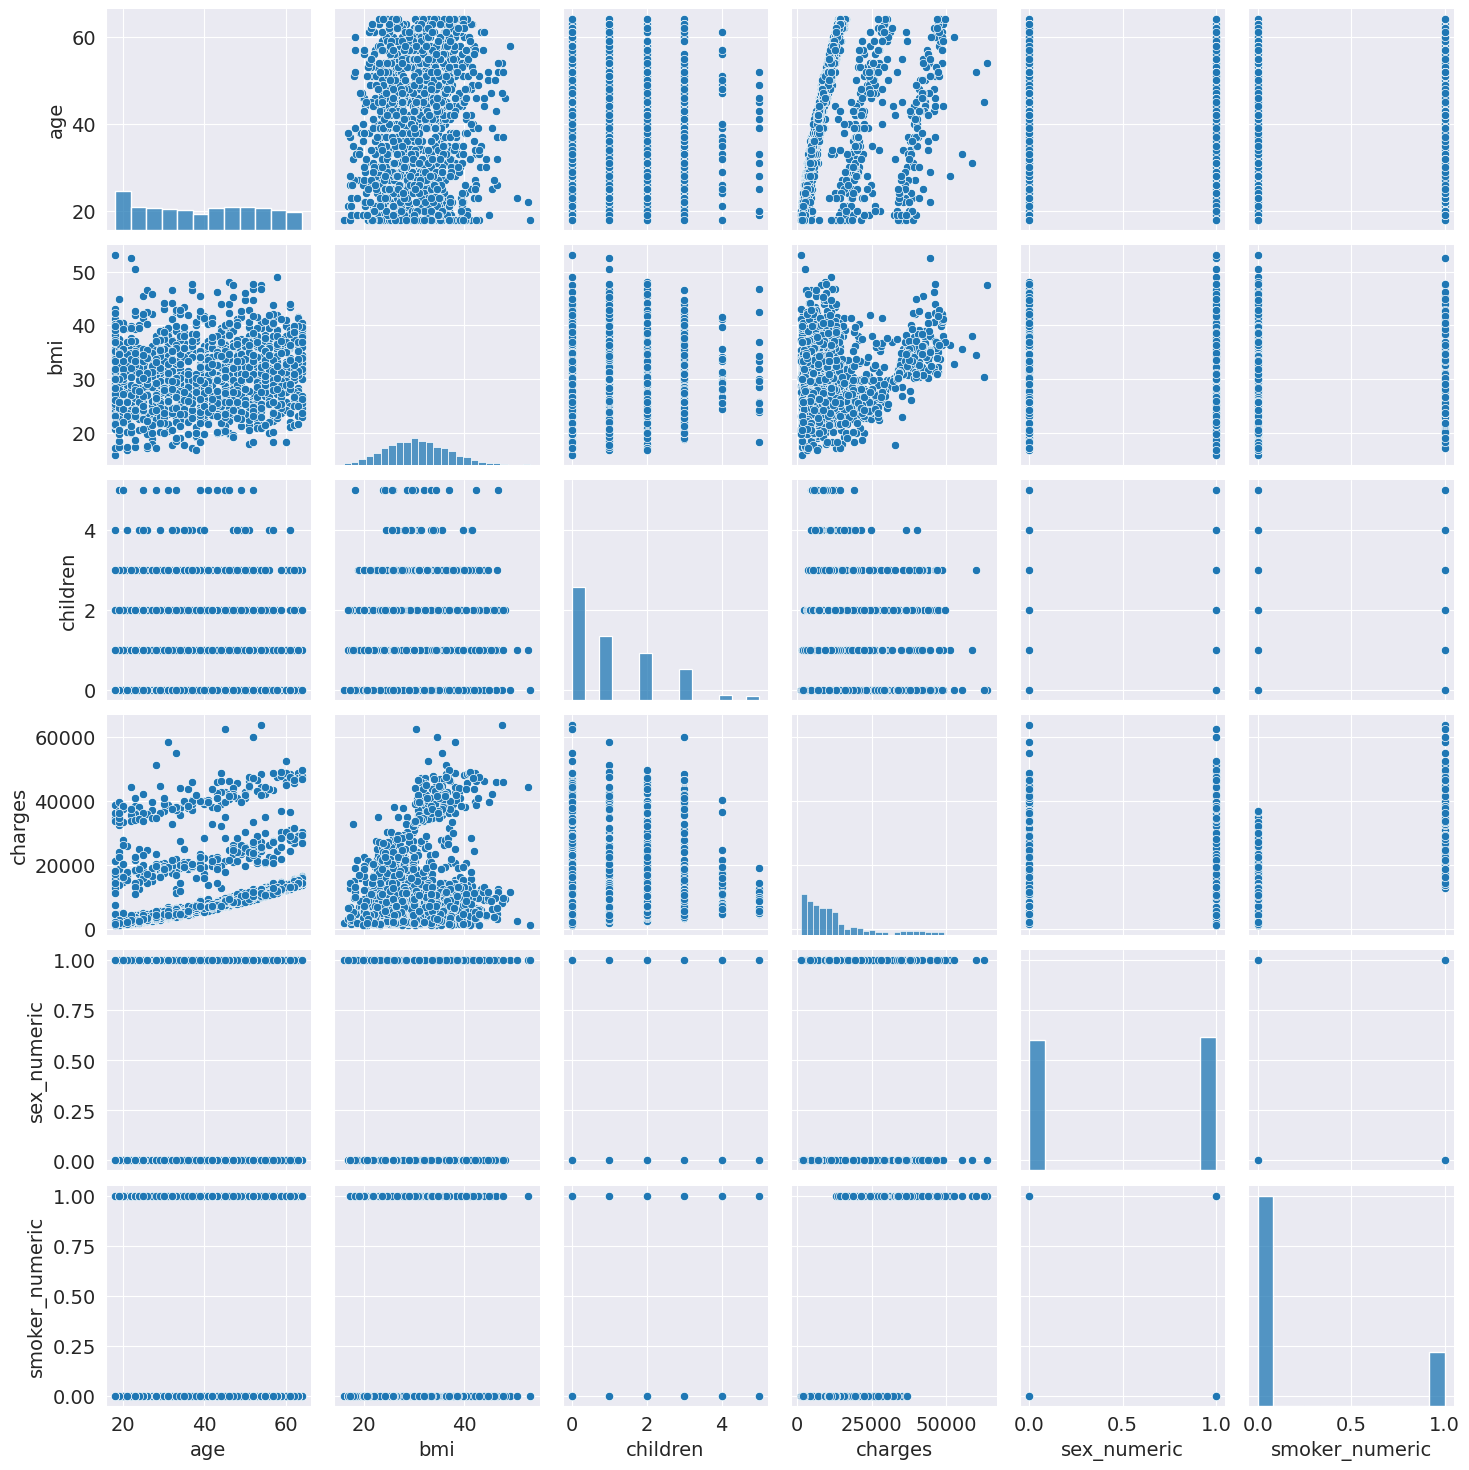

In [38]:
sns.pairplot(data=df)

In [11]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [12]:
df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [13]:
fig=px.histogram(df,x='age',marginal='box',nbins=47,title='age distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
fig=px.histogram(df,x='bmi',marginal='box',color_discrete_sequence=['red'],title='bmi distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig=px.histogram(df,x='charges',marginal='box',color='smoker',color_discrete_sequence=['red','green'],title='annual medical charges')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
fig=px.histogram(df,x='charges',marginal='box',color='sex',color_discrete_sequence=['red','green'],title='annual medical charges')
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [18]:
px.histogram(df,x='smoker',color='sex',color_discrete_sequence=['red','green'],title='smoker vs sex')

In [19]:
fig=px.scatter(df,x='age',y='charges',color='smoker',color_discrete_sequence=['red','green'],opacity=0.8,hover_data=['sex'],title='age vs charges')
fig.update_traces(marker_size=5)
fig.show()

In [20]:
fig=px.scatter(df,x='bmi',y='charges',color='smoker',color_discrete_sequence=['red','green'],opacity=0.8,hover_data=['sex'],title='bmi vs charges')
fig.update_traces(marker_size=5)
fig.show()

In [21]:
px.scatter(df,x='children',y='charges')

In [22]:
px.violin(df,x='children',y='charges')

In [23]:
df.charges.corr(df.age)

0.2990081933306476

In [24]:
df.charges.corr(df.children)

0.06799822684790478

In [25]:
df.charges.corr(df.bmi)

0.19834096883362895

In [26]:
smoker_values={'yes':1,'no':0}
smoker_numeric=df.smoker.map(smoker_values)
smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [27]:
df.charges.corr(smoker_numeric)

0.787251430498478

In [28]:
gender_values={'male':1,'female':0}
gender_numeric=df.sex.map(gender_values)
gender_numeric

,sex
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [29]:
# Convert 'sex' and 'smoker' columns to numeric before calculating correlation.
# Create a dictionary to map 'sex' values to numeric values.
gender_values = {'male': 1, 'female': 0}
# Use the map function to convert the 'sex' column to numeric.
df['sex_numeric'] = df['sex'].map(gender_values)

# Similarly, for the smoker column
smoker_values={'yes':1,'no':0}
df['smoker_numeric']=df.smoker.map(smoker_values)

# Now, calculate the correlation matrix, only including numeric features.
# Include the newly created numeric columns and exclude the originals.
df[['age', 'bmi', 'children', 'charges', 'sex_numeric', 'smoker_numeric']].corr()

,age,bmi,children,charges,sex_numeric,smoker_numeric
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251
sex_numeric,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185
smoker_numeric,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000


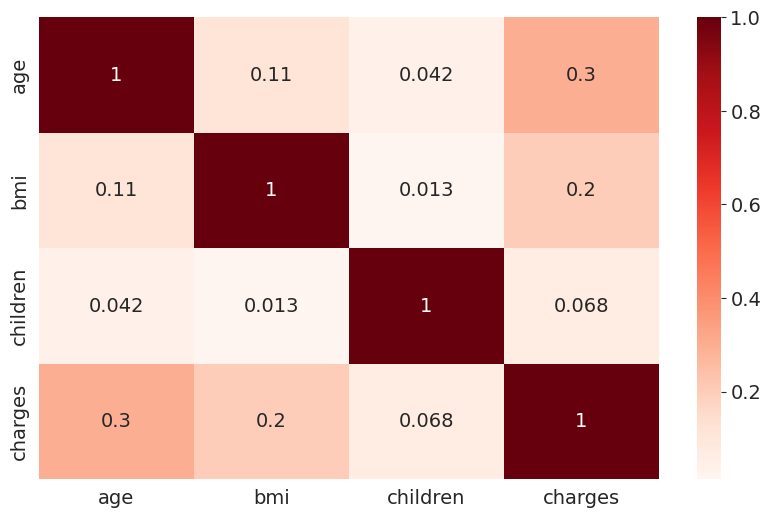

In [30]:
corr_matrix = df[['age', 'bmi', 'children', 'charges']].corr()

# Create the heatmap with annotations
sns.heatmap(corr_matrix, cmap='Reds', annot=True)  # Changed 'cmaps' to 'cmap' and 'TRUE' to True
plt.show()

**LINEAR REGRESSION AS SINGLE FEATURE**

In [31]:
non_smoker_df=df[df.smoker=='no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges,sex_numeric,smoker_numeric
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
5,31,female,25.740,0,no,southeast,3756.62160,0,0
...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0,0
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0


<Axes: title={'center': 'non_smokers'}, xlabel='age', ylabel='charges'>

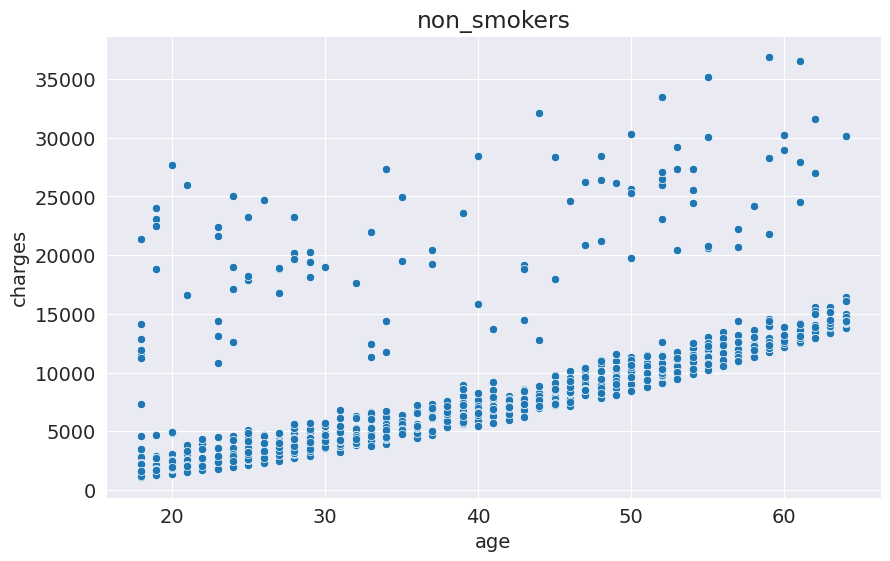

In [32]:
plt.title('non_smokers')
sns.scatterplot(data=non_smoker_df,x='age',y='charges')

In [33]:
def estimate_charges(age,w,b):
  return w*age+b

In [34]:
ages=non_smoker_df.age
w=50
b=100
estimated_charges= estimate_charges(ages,w,b)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


Text(0, 0.5, 'charges')

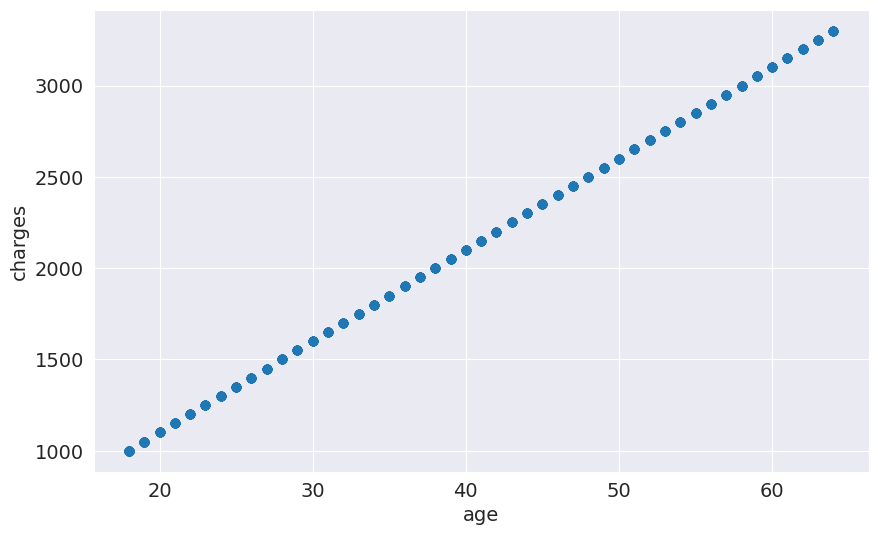

In [35]:
plt.scatter(ages,estimated_charges);
plt.xlabel('age')
plt.ylabel('charges')

Text(0, 0.5, 'charges')

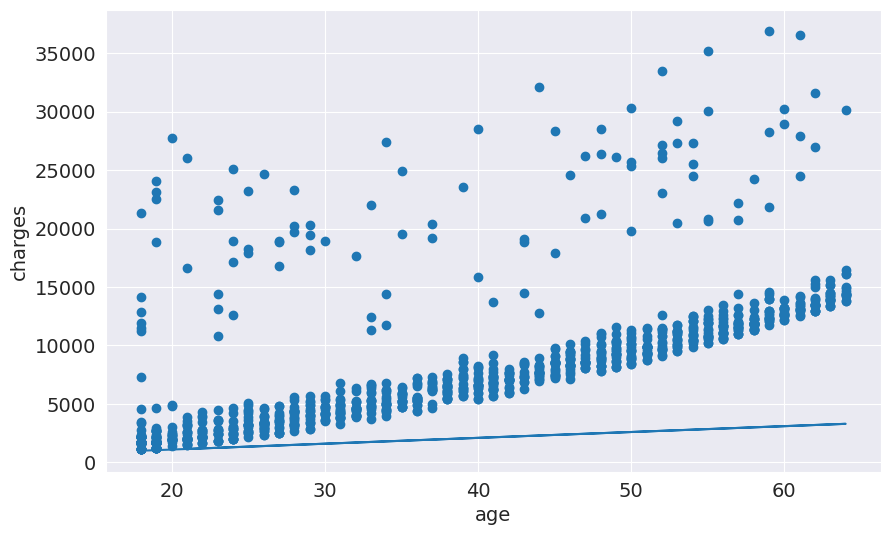

In [36]:
target= non_smoker_df.charges
plt.plot(ages,estimated_charges)
plt.scatter(ages,target)
plt.xlabel('age')
plt.ylabel('charges')

In [44]:
def try_parameters(w,b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges
  estimated_charges=estimate_charges(ages,w,b)
  plt.plot(ages,estimated_charges)
  plt.scatter(ages,target)
  plt.xlabel('age')
  plt.ylabel('charges')


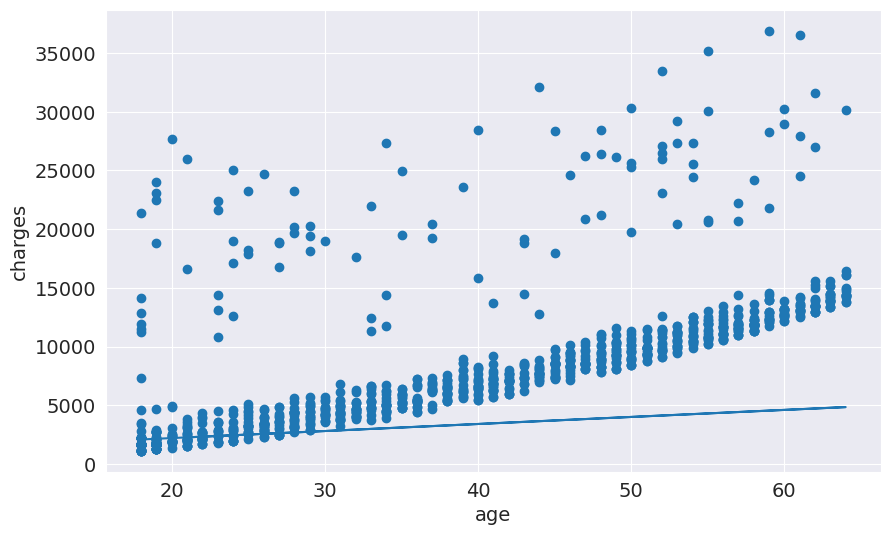

In [41]:
try_parameters(60,1000)

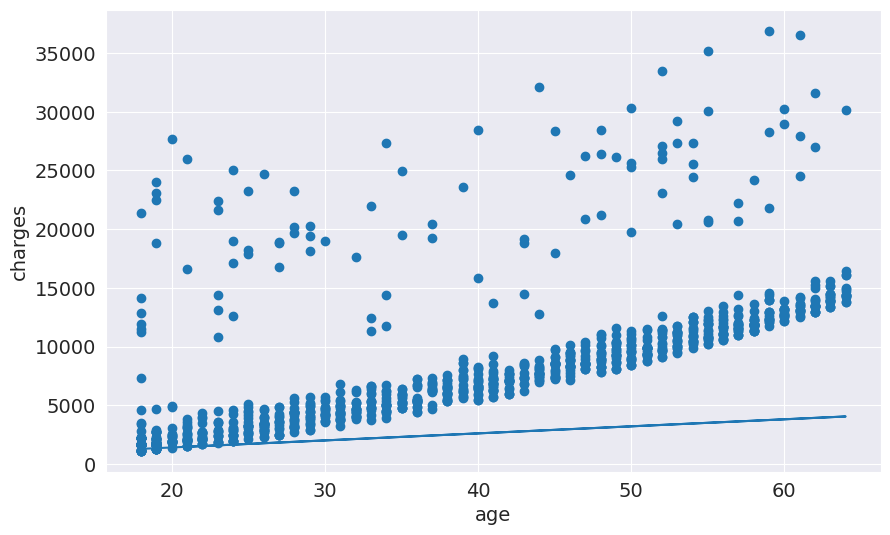

In [45]:
try_parameters(60,200)

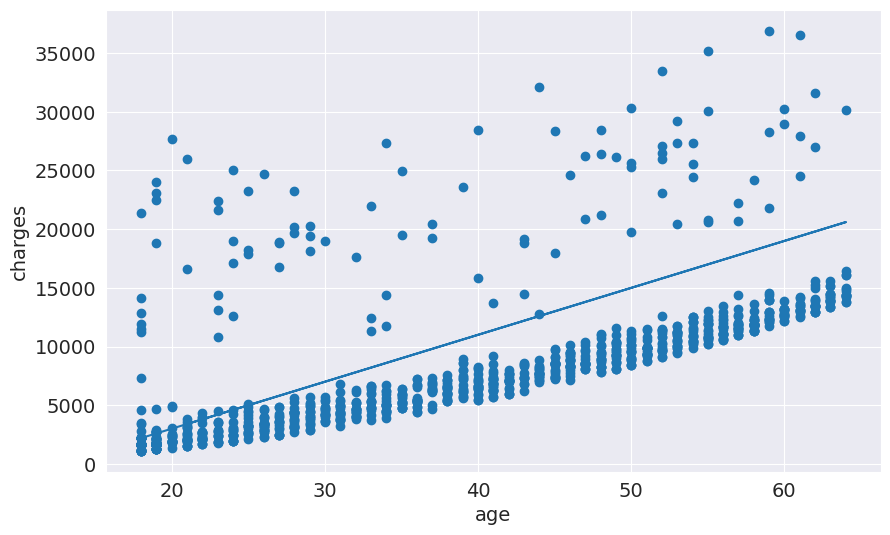

In [49]:
try_parameters(400,-5000)

In [50]:
def rmse(targets,estimated_charges):
  return np.sqrt(np.mean((targets-estimated_charges)**2))


In [51]:
w=50
b=100

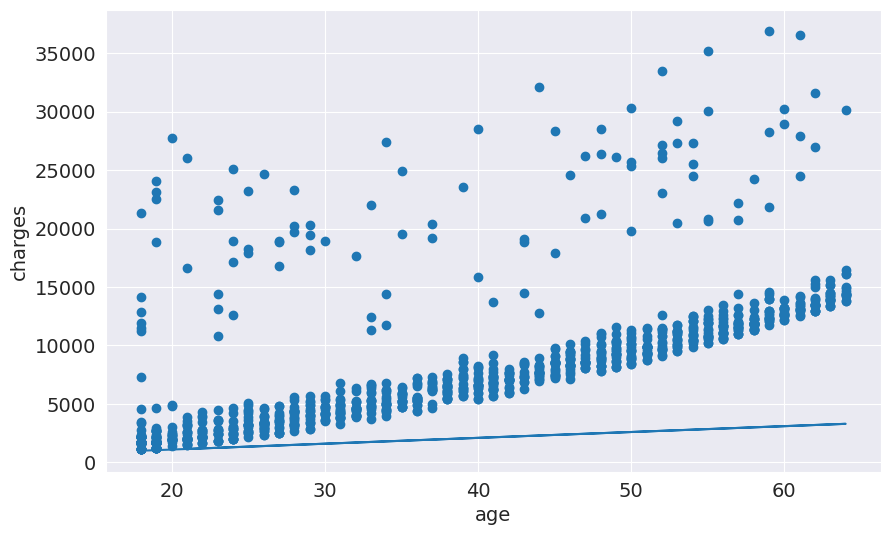

In [52]:
try_parameters(w,b)

In [53]:
targets=non_smoker_df.charges
predicted=estimate_charges(ages,w,b)
rmse(targets,predicted)

8461.949562575493

In [56]:
def try_parameters(w,b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges
  estimated_charges=estimate_charges(ages,w,b)
  plt.plot(ages,estimated_charges)
  plt.scatter(ages,target)
  plt.xlabel('age')
  plt.ylabel('charges')
  print(rmse(target,estimated_charges))

4669.651885507871


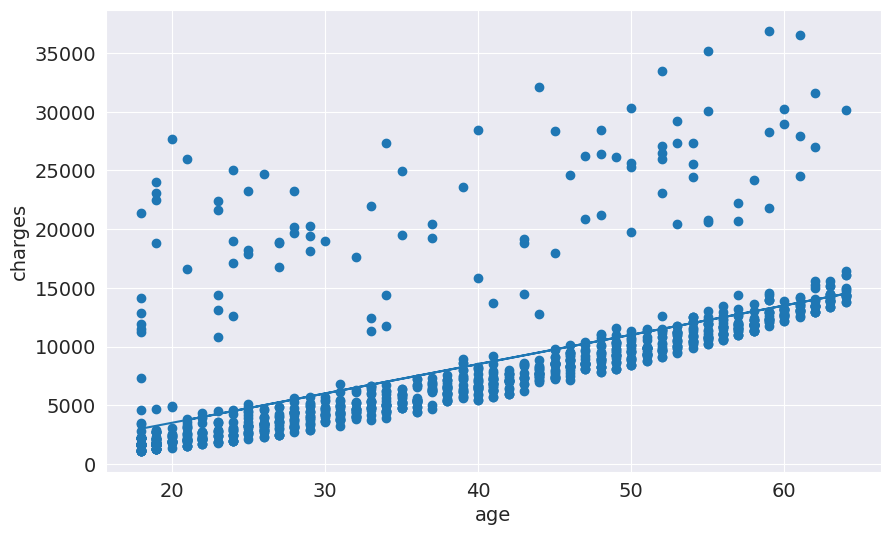

In [60]:
try_parameters(250,-1500)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
model=LinearRegression()

In [68]:
ages=non_smoker_df[['age']]
target=non_smoker_df.charges
model.fit(ages,target)

LinearRegression()

In [69]:
model.predict(np.array([[23],[37]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([4055.30443855, 7796.78921819])

In [71]:
predictions=model.predict(ages)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [72]:
rmse(predictions,targets)

4662.505766636395

In [77]:
model.coef_

array([267.24891283])

In [76]:
model.intercept_

-2091.4205565650864

4662.505766636395


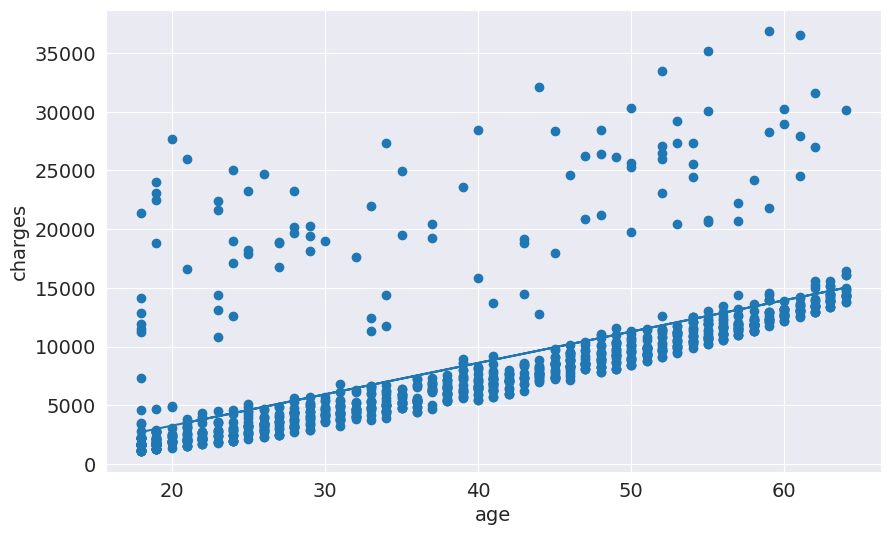

In [78]:
try_parameters(model.coef_,model.intercept_)

In [83]:
from sklearn.linear_model import SGDRegressor # Import the SGDRegressor class from the sklearn.linear_model module
model=SGDRegressor()


In [84]:
ages=non_smoker_df[['age']]
target=non_smoker_df.charges
model.fit(ages,target)

SGDRegressor()

In [85]:
predictions=model.predict(ages)
predictions

array([2342.82609622, 3987.12408255, 4809.27307572, ..., 2342.82609622,
       2342.82609622, 2836.11549212])

5519.486381876077


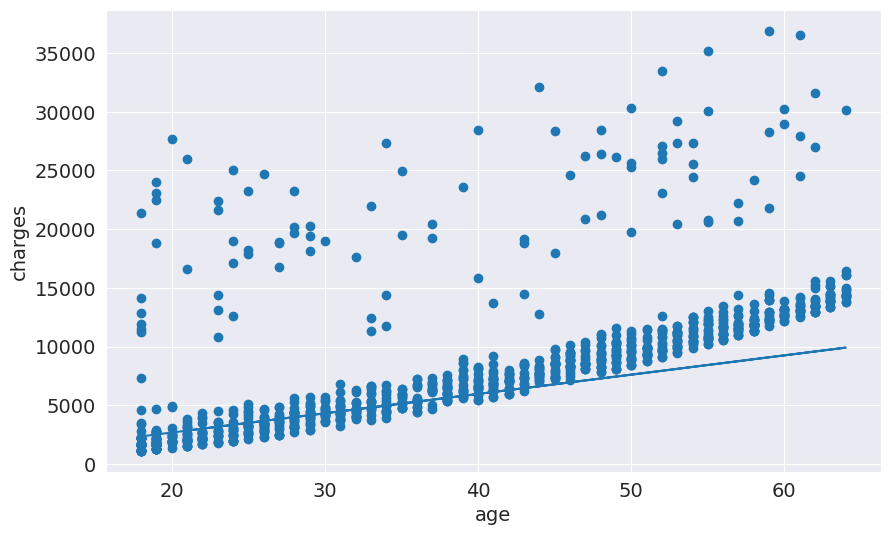

In [86]:
try_parameters(model.coef_,model.intercept_)

In [87]:
smoker_df=df[df.smoker=='yes']

In [92]:
ages=smoker_df[['age']]

In [90]:
actual_charges=smoker_df.charges

In [105]:
model=LinearRegression()

In [106]:
model.fit(ages,actual_charges)

LinearRegression()

In [107]:
predictions=model.predict(ages)

In [108]:
def try_parameters(w,b):
  ages=smoker_df[['age']]
  target=smoker_df.charges
  estimated_charges=estimate_charges(ages,w,b)
  plt.plot(ages,estimated_charges)
  plt.scatter(ages,target)
  plt.xlabel('age')
  plt.ylabel('charges')
  print(rmse(target,estimated_charges))

nan


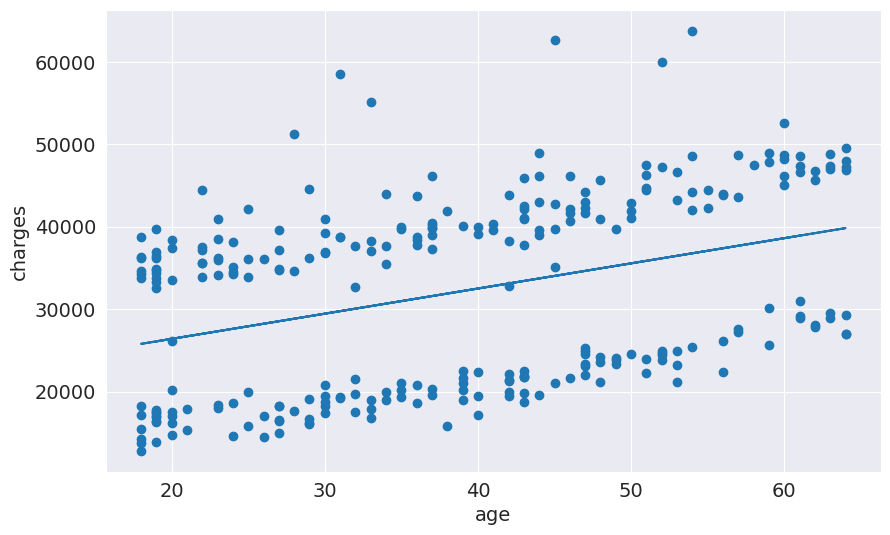

In [109]:
try_parameters(model.coef_,model.intercept_)

In [110]:
rmse(predictions,actual_charges)

10711.00334810241

MULTIPLE FEATURES


In [112]:
inputs, targets= non_smoker_df[['age','bmi']], non_smoker_df.charges

In [115]:
model = LinearRegression()

# Now you can fit the model to your data
model = model.fit(inputs, targets)

In [116]:
predictions=model.predict(inputs)

In [117]:
loss=rmse(predictions,targets)
loss

4662.3128354612945

In [120]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [121]:
fig=px.scatter(non_smoker_df,x='bmi',y='charges')
fig.show()

In [122]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [123]:
fig=px.strip(non_smoker_df,x='children',y='charges')
fig.show()

In [125]:
inputs, targets= non_smoker_df[['age','bmi','children']], non_smoker_df.charges

model = LinearRegression()

# Now you can fit the model to your data
model = model.fit(inputs, targets)

predictions=model.predict(inputs)

loss=rmse(predictions,targets)
loss

4608.470405038247

In [126]:
smoker_df.charges.corr(smoker_df.bmi)

0.8064806070155404

In [127]:
inputs, targets= smoker_df[['age','bmi']], smoker_df.charges

model = LinearRegression()

# Now you can fit the model to your data
model = model.fit(inputs, targets)

predictions=model.predict(inputs)

loss=rmse(predictions,targets)
loss

5722.782238884455

In [128]:
smoker_df.charges.corr(smoker_df.children)

0.03594500581268586

In [132]:
inputs, targets= smoker_df[['age','bmi','children']], smoker_df.charges

model = LinearRegression()

# Now you can fit the model to your data
model = model.fit(inputs,targets)

predicitions=model.predict(inputs)

loss=rmse(predictions,targets)
loss

5722.782238884455

In [133]:
inputs, targets= df[['age','bmi','children']], df.charges

model = LinearRegression()

# Now you can fit the model to your data
model = model.fit(inputs,targets)

predicitions=model.predict(inputs)

loss=rmse(predicitions,targets)
loss

11355.317901125973

<Axes: xlabel='smoker', ylabel='charges'>

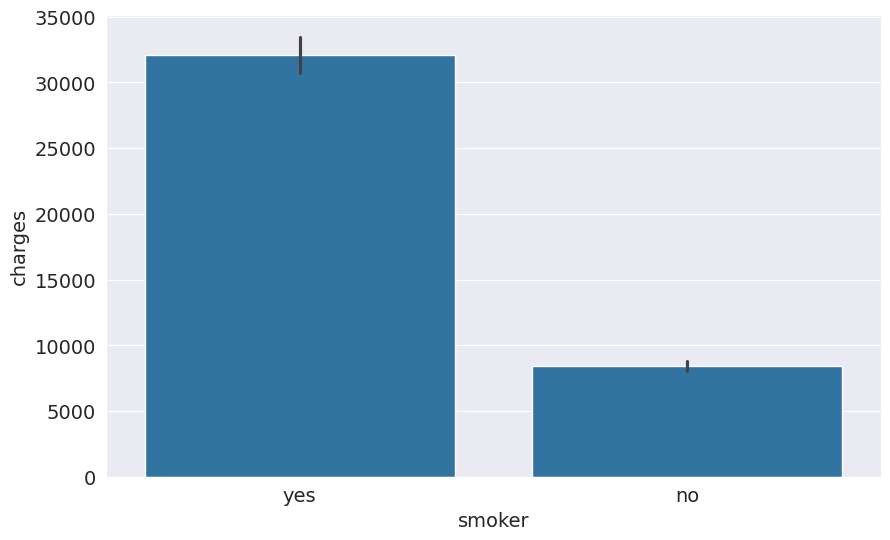

In [135]:
sns.barplot(data=df,y='charges',x='smoker')

In [137]:
smoker_code={'yes':1,'no':0}
df['smoker_codes']=df.smoker.map(smoker_code)

In [138]:
df

,age,sex,bmi,children,smoker,region,charges,sex_numeric,smoker_numeric,smoker_codes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0


In [139]:
inputs, targets= df[['age','bmi','children','smoker_codes']], df.charges

model = LinearRegression()

# Now you can fit the model to your data
model = model.fit(inputs,targets)

predicitions=model.predict(inputs)

loss=rmse(predicitions,targets)
loss

6056.439217188081

<Axes: xlabel='sex', ylabel='charges'>

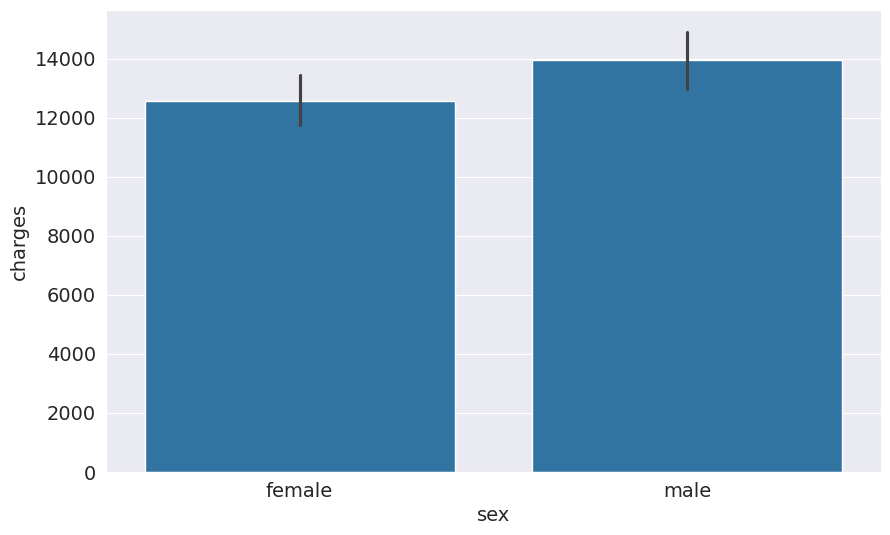

In [140]:
sns.barplot(data=df,y='charges',x='sex')

In [141]:
sex_code={'male':1,'female':0}
df['sex_codes']=df.sex.map(sex_code)

In [142]:
inputs, targets= df[['age','bmi','children','smoker_codes','sex_codes']], df.charges

model = LinearRegression()

# Now you can fit the model to your data
model = model.fit(inputs,targets)

predicitions=model.predict(inputs)

loss=rmse(predicitions,targets)
loss

6056.100708754546

<Axes: xlabel='region', ylabel='charges'>

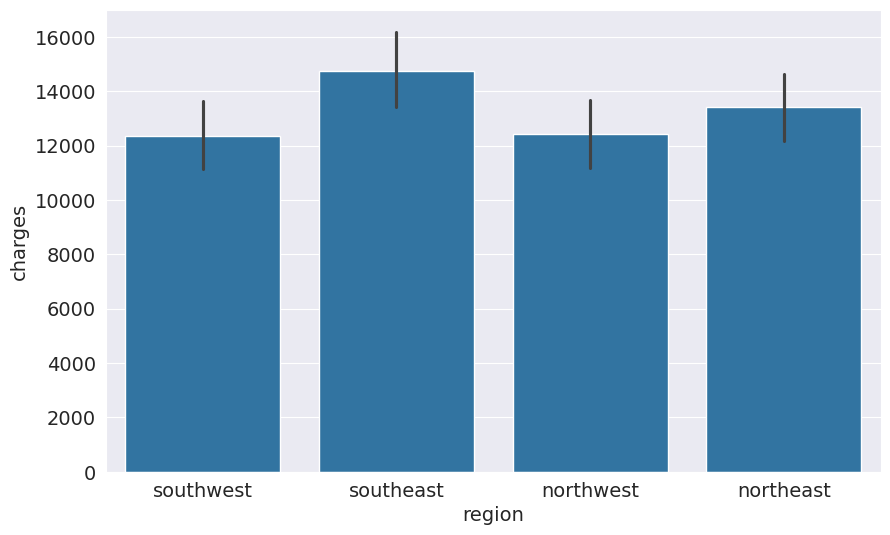

In [144]:
sns.barplot(data=df,y='charges',x='region')

In [145]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [146]:
one_hot=enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [147]:
df[['northeast','northwest','southeast','southwest']]=one_hot

In [148]:
df

,age,sex,bmi,children,smoker,region,charges,sex_numeric,smoker_numeric,smoker_codes,sex_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0,0.0,0.0,0.0,1.0


In [149]:
inputs, targets= df[['age','bmi','children','smoker_codes','sex_codes','northeast','northwest','southeast','southwest']], df.charges

model = LinearRegression()

# Now you can fit the model to your data
model = model.fit(inputs,targets)

predicitions=model.predict(inputs)

loss=rmse(predicitions,targets)
loss

6041.6796511744515

In [154]:
non_smoker_df=df[df.smoker=='no']
non_smoker_df

sex_codes={'male':1,'female':0}
sex_code=non_smoker_df.sex.map(sex_codes)
non_smoker_df['sex_codes']=sex_code

enc=preprocessing.OneHotEncoder()
enc.fit(non_smoker_df[['region']])
enc.categories_

one_hot=enc.transform(non_smoker_df[['region']]).toarray()
one_hot

non_smoker_df[['northeast','northwest','southeast','southwest']]=one_hot

<ipython-input-154-22bc297dd961>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-154-22bc297dd961>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [155]:

inputs, targets= non_smoker_df[['age','bmi','children','sex_codes','northeast','northwest','southeast','southwest']], non_smoker_df.charges

model = LinearRegression()

# Now you can fit the model to your data
model = model.fit(inputs,targets)

predicitions=model.predict(inputs)

loss=rmse(predicitions,targets)
loss

4573.074988795492

In [156]:
smoker_df=df[df.smoker=='yes']
smoker_df

sex_codes={'male':1,'female':0}
sex_code=smoker_df.sex.map(sex_codes)
smoker_df['sex_codes']=sex_code

enc=preprocessing.OneHotEncoder()
enc.fit(smoker_df[['region']])
enc.categories_

one_hot=enc.transform(smoker_df[['region']]).toarray()
one_hot

smoker_df[['northeast','northwest','southeast','southwest']]=one_hot

<ipython-input-156-bd9c8e03ace4>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-156-bd9c8e03ace4>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [158]:
inputs, targets= smoker_df[['age','bmi','children','sex_codes','northeast','northwest','southeast','southwest']], smoker_df.charges

model = LinearRegression()

# Now you can fit the model to your data
model = model.fit(inputs,targets)

predicitions=model.predict(inputs)

loss=rmse(predicitions,targets)
loss

5668.4678821121515

SCALLING ACTUALLY STANDARDISATION
used for making a relation between the weights and correlation


In [159]:
from sklearn.preprocessing import StandardScaler

In [161]:
numeric_col=['age','bmi','children']
scaler=StandardScaler()
scaler.fit(df[numeric_col])

StandardScaler()

In [163]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [165]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [167]:
scaled_inputs=scaler.transform(df[numeric_col])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [168]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_numeric', 'smoker_numeric', 'smoker_codes', 'sex_codes',
       'northeast', 'northwest', 'southeast', 'southwest'],
      dtype='object')

In [172]:
cat_cols = ['sex_codes', 'smoker_codes', 'northeast', 'northwest', 'southeast', 'southwest']  # Changed tuple to list
categorical_data = df[cat_cols].values

In [174]:
inputs=np.concatenate((scaled_inputs,categorical_data),axis=1)
targets=df.charges

model = LinearRegression()

# Now you can fit the model to your data
model = model.fit(inputs,targets)

predicitions=model.predict(inputs)

loss=rmse(predicitions,targets)
loss

6041.679651174452